# Задание 1. Загрузить данные из файла "insurance.csv"

In [18]:
import pandas as pd


data = pd.read_csv("insurance.csv")

# 2. С помощью метода describe() посмотреть статистику по данным. Сделать выводы

In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Выводы
- Непустых значений в каждом из столбцов одинаковое количество - 1338
- Средний возраст - 39.207025, возраст людей находится в диапазоне от 18 до 64 лет
- bmi (средний индекс массы тела) - 30.7, значения находятся в диапазоне от 16 до 53.1
- Среднее количество детей - 1.1, количество находится в диапазоне от 0 до 5
- В страховых выплатах среднее значение - 13270.4. Максимальное - 63770.43, минимальное - 1121.87

# Задание 3. Построить гистограммы для числовых показателей. Сделать выводы

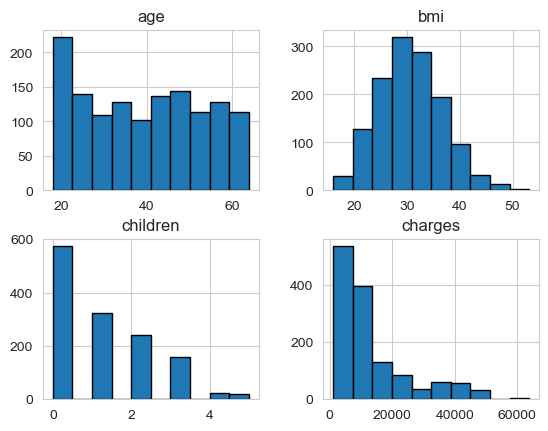

In [20]:
import matplotlib.pyplot as plt

data.hist(edgecolor='black') # график распределения
plt.show()

## Выводы
У всего набора данных 7 столбцов, 3 из которых не числовые: sex, smoker и region

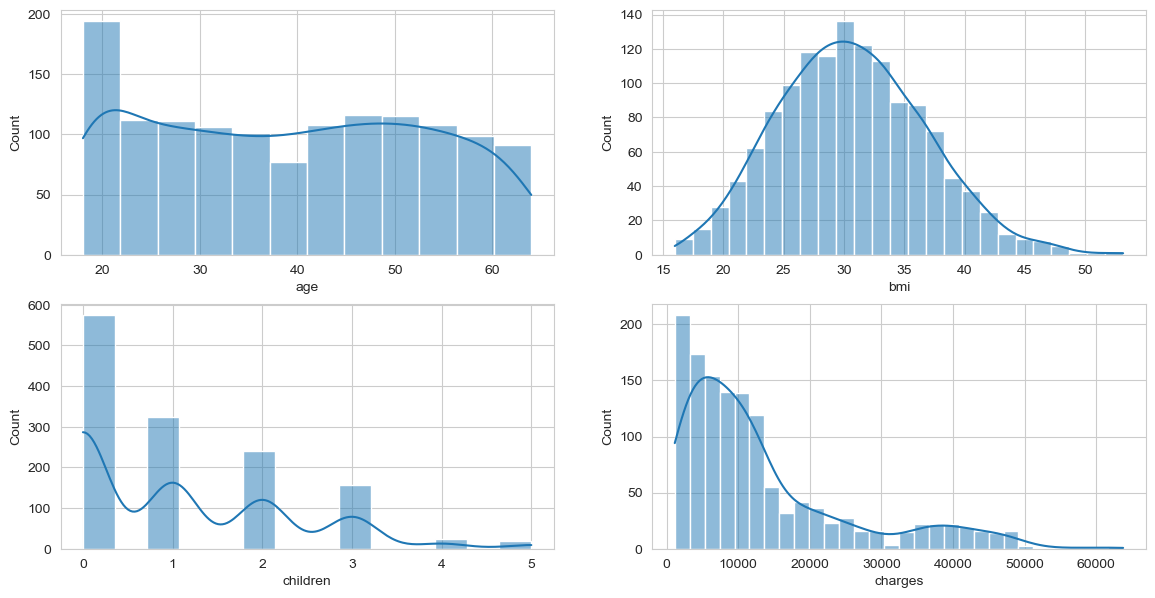

In [21]:
import seaborn as sns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

for i, j in enumerate(data.drop(['sex', 'smoker', 'region'], axis=1).columns):
    sns.histplot(data[j], kde=True, ax=axs[i//2, i%2]) # ищем индекс, т.к. axs - двумерный массив

## Выводы
- В колонке age значение 20 встречается чаще других
- В колонке children довольно мало значений 4 и 5
- В колонке charges в основном встречаются значения до 15,000
- В колонке bmi хорошее распределение значений

# Задание 4. Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges)
- Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии)
- Добавить легенду на графики
- Сделать выводы

## Меры центральной тенденции

In [22]:
import numpy as np
import scipy.stats as sts


# Для bmi
moda_bmi = sts.mode(data['bmi'], keepdims=False)
mean_bmi = np.mean(data['bmi'])
med_bmi = np.median(data['bmi'])
print(f'Для bmi:\nМода: {moda_bmi}\nСреднее значение: {round(mean_bmi, 2)}\nМедиана: {med_bmi}', end='\n\n')

# Для charges
moda_charges = sts.mode(data['charges'], keepdims=False)
mean_charges = np.mean(data['charges'])
med_charges = np.median(data['charges'])
print(f'Для charges:\nМода: {moda_charges}\nСреднее значение: {round(mean_charges, 2)}\nМедиана: {med_charges}')

Для bmi:
Мода: ModeResult(mode=32.3, count=13)
Среднее значение: 30.66
Медиана: 30.4

Для charges:
Мода: ModeResult(mode=1639.5631, count=2)
Среднее значение: 13270.42
Медиана: 9382.033


## Меры разброса

In [23]:
bmi_scope = data['bmi'].max() - data['bmi'].min() # Размах
bmi_std = data['bmi'].std() # Стандартное отклонение
bmi_iqr = sts.iqr(data['bmi'], interpolation='midpoint') # Межквартильный размах (IQR)
print(f"BMI:\nРазмах: {bmi_scope}\nСтандартное отклонение: {round(bmi_std, 2)}\nМежквартильный размах: {round(bmi_iqr, 2)}", end='\n\n')

charges_scope = data['charges'].max() - data['charges'].min()
charges_std = data['charges'].std()
charges_iqr = sts.iqr(data['charges'], interpolation='midpoint')
print(f"Для charges:\nРазмах: {round(charges_scope, 2)}\nСтандартное отклонение: {round(charges_std, 2)}\nМежквартильный размах: {round(charges_iqr, 2)}", end='\n\n')

BMI:
Размах: 37.17
Стандартное отклонение: 6.1
Межквартильный размах: 8.38

Для charges:
Размах: 62648.55
Стандартное отклонение: 12110.01
Межквартильный размах: 11879.8



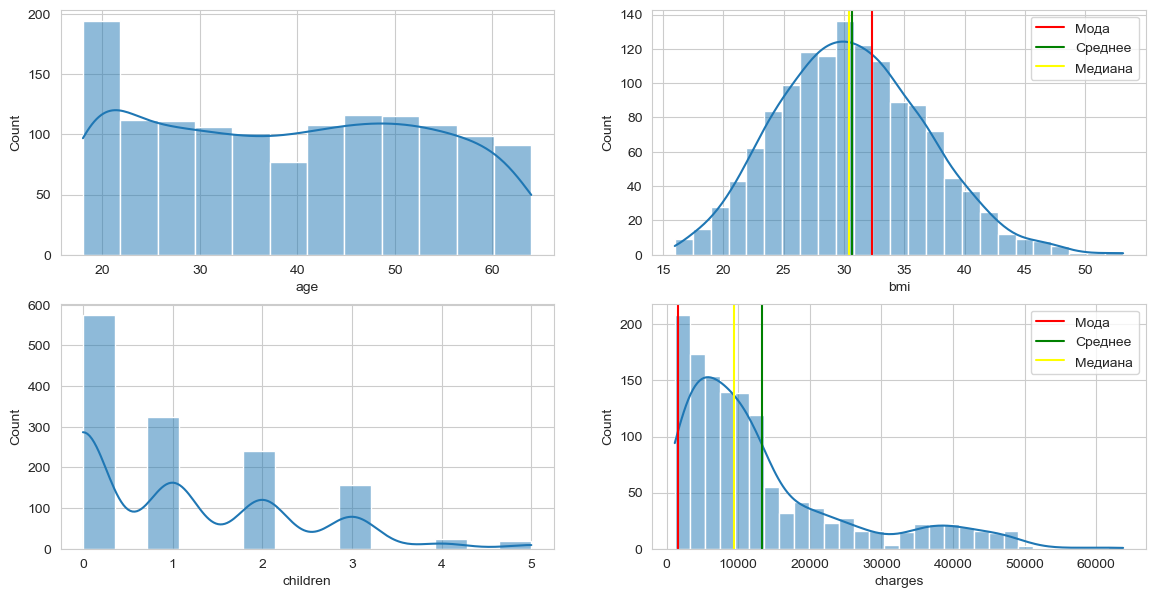

In [24]:
# Построим гистограммы с помощью seaborn
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

for i, j in enumerate(data.drop(['sex', 'smoker', 'region'], axis=1).columns):
    sns.histplot(data[j], kde=True, ax=axs[i//2, i%2]) # Ищем индекс, т.к. axs - двумерный массив

m_c_t = ['Мода', 'Среднее', 'Медиана']
colors = ['red', 'green', 'yellow']
s = 0
for k in [moda_bmi[0], mean_bmi, med_bmi]:
    axs[0, 1].axvline(x=k, color=colors[s], label=f'{m_c_t[s]}')
    s += 1
    axs[0, 1].legend()

s = 0
for k in [moda_charges[0], mean_charges, med_charges]:
    axs[1, 1].axvline(x=k, color=colors[s], label=f'{m_c_t[s]}')
    s += 1
    axs[1, 1].legend()

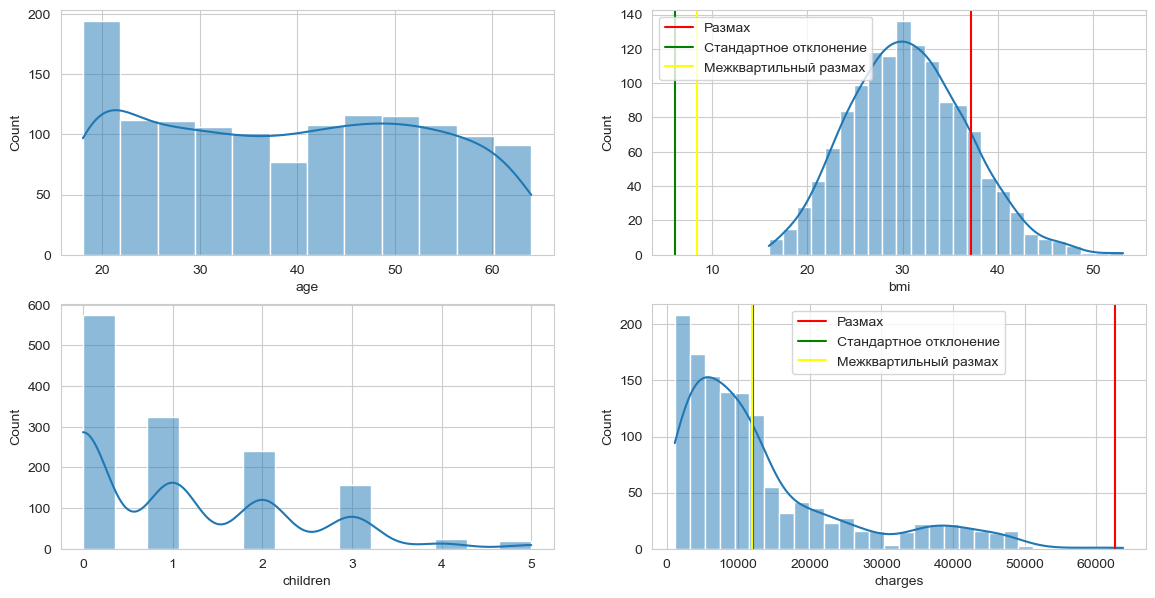

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

for i, j in enumerate(data.drop(['sex', 'smoker', 'region'], axis=1).columns):
    sns.histplot(data[j], kde=True, ax=axs[i//2, i%2]) # Ищем индекс, т.к. axs - двумерный массив

m_c_i = ['Размах', 'Стандартное отклонение', 'Межквартильный размах']
colors = ['red', 'green', 'yellow']
s = 0
for k in [bmi_scope, bmi_std, bmi_iqr]:
    axs[0, 1].axvline(x=k, color=colors[s], label=f'{m_c_i[s]}')
    s += 1
    axs[0, 1].legend()

s = 0
for k in [charges_scope, charges_std, charges_iqr]:
    axs[1, 1].axvline(x=k, color=colors[s], label=f'{m_c_i[s]}')
    s += 1
    axs[1, 1].legend()

## Выводы
- Меры центральной тенденции для столбца bmi находятся примерно в одном значении, что нельзя сказать про charges
- Размах (разница между максимальным значением и минимальным) для bmi и charges сильно разнится со стандартным отклонением и межквартильным размахом. Для bmi стандартное отклонение отличается от межквартильного размаха сильнее, чем у столбца charges

# Задание 5. Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы

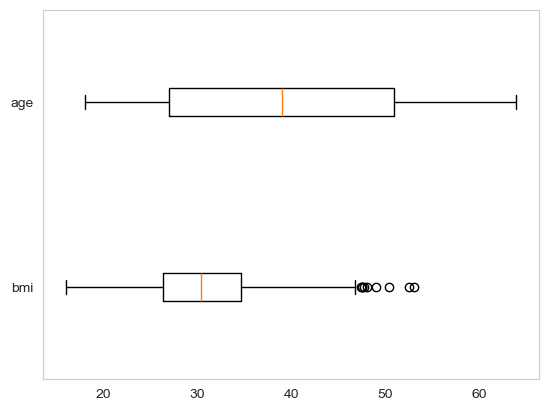

In [26]:
plt.figure()
plt.boxplot([data['bmi'], data['age']], labels=['bmi', 'age'], vert=False)
plt.grid()
plt.show()

## Выводы
Среди значений в столбце age нет выбросов, в отличие от столбца bmi. Графики показывают медиану (оранжевая вертикальная линия посередине коробки), внутри коробки 50% значений каждого из столбцов, на усах - остальные 50% значений (за исключением выбросов, они находятся за пределами усов)

# Задание 6. Используя признак charges или bmi, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы

Нужно взять разные размеры выборок (так как записей всего 1338, то возьмем 10, 100, 250, 900) и будем 300 раз для каждого размера выборок проверять, выполняется ли центральная предельная теорема

Распределение при длине выборки = 10: стандартное отклонение = 1.98, среднее = 30.78
Распределение при длине выборки = 100: стандартное отклонение = 0.61, среднее = 30.63
Распределение при длине выборки = 250: стандартное отклонение = 0.36, среднее = 30.67
Распределение при длине выборки = 900: стандартное отклонение = 0.12, среднее = 30.68


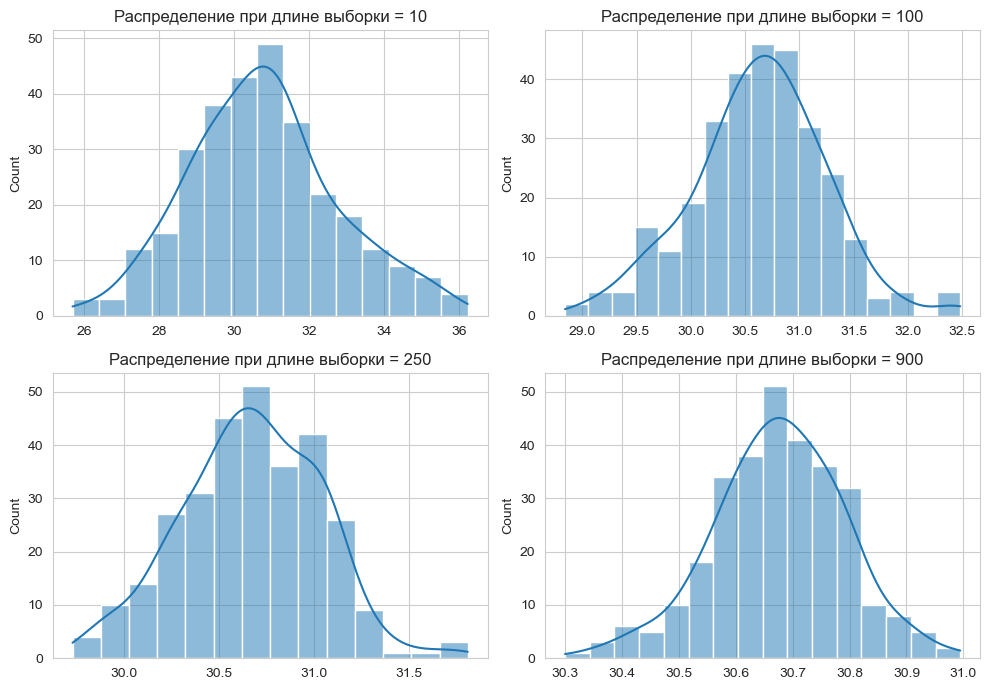

In [27]:
n = (10, 100, 250, 900) # Длины выборок (сколько значений из генеральной совокупности берем)

plt.figure(figsize=(10, 7))
for i in range(len(n)):
    means = []
    for j in range(1, 301):
        selection = data['bmi'].sample(n[i]) # Выборка определенной длины
        mean_selection = selection.mean() # Берем среднее значение для этой выборки
        means.append(mean_selection) # Бобавляем в список это среднее, чтобы отразить распределение этих средних выборки определенной длины на гистограмме
    plt.subplot(2, 2, i + 1)
    sns.histplot(means, kde=True)
    plt.title(f'Распределение при длине выборки = {n[i]}')
    plt.tight_layout() # Расстояние между графиками
    print(f'Распределение при длине выборки = {n[i]}: стандартное отклонение = {round(np.std(means), 2)}, среднее = {round(np.mean(means), 2)}')

## Выводы
Была проверена центральная предельная теорема: среднее значение при каждом распределении выборочных средних разных длин при увеличнеии длины выборки начинает стремиться к среднему значению глобальной совокупности. Также можно заметить, что при увеличении длин выборок, стандартное отклонение начинает стремиться к нулевому значению, что опять же подтверждает центральную предельную теорему

# Задание 7. Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела

Для расчета доверительного интервала нужно множество раз извлечь из генеральной совокупности выборки длины n и затем для каждой выборки рассчитать среднее значение и свой доверительный интервал.

95% доверительный интервал:
- Для нижней границы: x - 1.96 SE
- Для верхней границы: x + 1.96 SE

99% доверительный интервал:
- Для нижней границы: x - 2.58 SE
- Для верхней границы: x + 2.58 SE

Где x - среднее выборки, а SE (стандартная ошибка среднего) - sd (стандартное отклонение выборки) / sqrt(n), n - длина выборки

In [28]:
from math import sqrt

n = (75, 750) # Длины выборок (сколько значений из генеральной совокупности берем)

def confidence_interval(column: str)->None:
    for i in range(len(n)):
        x = []
        for j in range(1, 301):
            selection = data[column].sample(n[i]) # Выборка (определенной длины)
            mean_selection = selection.mean() # Берем среднее значение для этой выборки
            x.append(mean_selection) # Добавляем в список это среднее, чтобы отразить распределение этих средних выборки определенной длины на гистограмме
        mean_x = round(np.mean(x), 3)
        std_x = round(np.std(x), 3)
        se = round(std_x/sqrt(n[i]), 3)
        print(f'Выборка колонки {column}, длина выборки = {n[i]}')
        print(f'x(среднее выборки) = {mean_x}, sd(ст. отклонение) = {std_x}, SE = {se}')
        print(f'95% доверительный интервал [{round(mean_x - 1.96 * se, 3)}, {round(mean_x + 1.96 * se, 3)}]')
        print(f'99% доверительный интервал [{round(mean_x - 2.58 * se, 3)}, {round(mean_x + 2.58 * se, 3)}]')
        print()
        
confidence_interval('bmi')
confidence_interval('charges')

Выборка колонки bmi, длина выборки = 75
x(среднее выборки) = 30.678, sd(ст. отклонение) = 0.706, SE = 0.082
95% доверительный интервал [30.517, 30.839]
99% доверительный интервал [30.466, 30.89]

Выборка колонки bmi, длина выборки = 750
x(среднее выборки) = 30.675, sd(ст. отклонение) = 0.156, SE = 0.006
95% доверительный интервал [30.663, 30.687]
99% доверительный интервал [30.66, 30.69]

Выборка колонки charges, длина выборки = 75
x(среднее выборки) = 13380.087, sd(ст. отклонение) = 1377.98, SE = 159.115
95% доверительный интервал [13068.222, 13691.952]
99% доверительный интервал [12969.57, 13790.604]

Выборка колонки charges, длина выборки = 750
x(среднее выборки) = 13274.891, sd(ст. отклонение) = 308.281, SE = 11.257
95% доверительный интервал [13252.827, 13296.955]
99% доверительный интервал [13245.848, 13303.934]



# Задание 8. Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений

Нулевая гипотеза: распределение индекса массы тела и расходов является нормальным

Альтернативная гипотеза: распределение индекса массы тела и расходов не является нормальным

In [29]:
# Тест Колмогорова-Смирнова (KS-тест):
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
selection = data['bmi'].sample(500)
selection=pd.DataFrame(scaler.fit_transform(selection.values.reshape(-1, 1)))
selection = selection.values.flatten()
test_sk = sts.kstest(selection, 'norm')
print(test_sk)

scaler = preprocessing.StandardScaler()
selection = data['charges'].sample(500)
selection=pd.DataFrame(scaler.fit_transform(selection.values.reshape(-1, 1)))
selection = selection.values.flatten()
test_sk = sts.kstest(selection, 'norm')
print(test_sk)

KstestResult(statistic=0.032253185483857916, pvalue=0.6634114134883207, statistic_location=0.009392009282069637, statistic_sign=1)
KstestResult(statistic=0.1920413850711672, pvalue=1.2630366627496664e-16, statistic_location=-0.06532249790691008, statistic_sign=1)


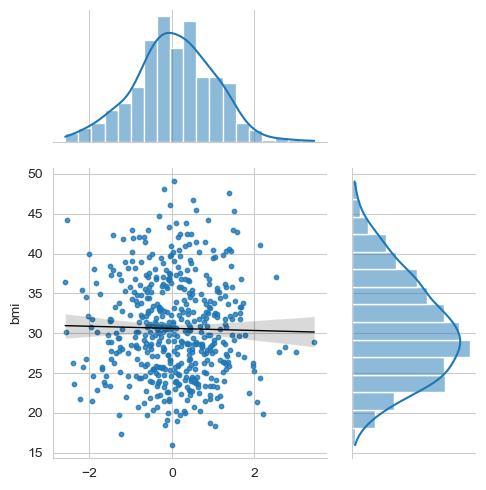

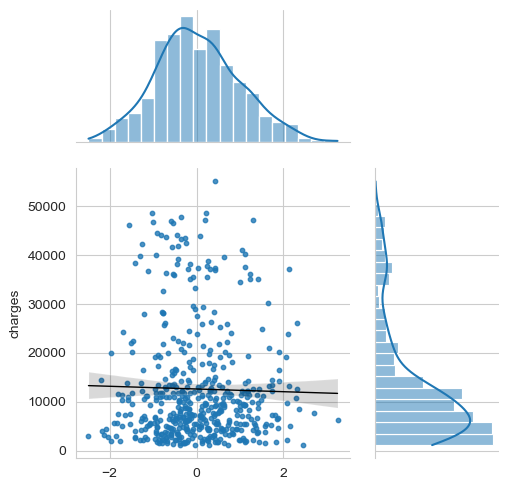

In [30]:
# Q-Q plot:
f_1 = sns.jointplot(x=np.random.normal(0, 1, 500), y=data['bmi'].sample(500), 
                    kind='reg', truncate=True, height=5, ratio=2, 
                    scatter_kws={"s": 10,}, line_kws={'lw': 1, 'color': 'black'})
f_2 = sns.jointplot(x=np.random.normal(0, 1, 500), y=data['charges'].sample(500), 
                    kind='reg', truncate=True, height=5, ratio=2, 
                    scatter_kws={"s": 10,}, line_kws={'lw': 1, 'color': 'black'})

## Выводы
Нулевая гипотеза выполняется, так как:
- pvalue для выборки из столбцов bmi и charges больше 0.05, а это означает то, что данные подчиняются нормальному распределению
- Меры центральной тенденции (медиана, мода, среднее) в обоих генеральных совокупностях не имеют одного значения,  это одно доказательство не подчинения нормальному распределению
- На графиках, построенных при помощи Q-Q plot видно, что данные имеют нормального распределения

# Задание 9. Загрузить данные из файла "ECDCCases.csv"

In [31]:
data = pd.read_csv('ECDCCases.csv')

# Задание 10. Проверить в данных наличие пропущенных значений

Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.

In [33]:
percent_missing = data.isnull().sum() * 100 / len(data)
pd.DataFrame({'percent_missing': percent_missing})

,percent_missing
dateRep,0.000000
day,0.000000
month,0.000000
year,0.000000
cases,0.000000
deaths,0.000000
countriesAndTerritories,0.000000
geoId,0.444236
countryterritoryCode,0.198695
popData2019,0.198695


In [34]:
data.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId'], axis=1, inplace=True)

In [35]:
data['countryterritoryCode'].fillna('other', inplace=True) # Заполнение категориального признака
data['popData2019'].fillna(data['popData2019'].median(), inplace=True) # Заполнение числового признака

C:\Users\user\AppData\Local\Temp\ipykernel_2124\1077000413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['countryterritoryCode'].fillna('other', inplace=True) # Заполнение категориального признака
C:\Users\user\AppData\Local\Temp\ipykernel_2124\1077000413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [36]:
data.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

# Задание 11. Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было

In [ ]:
data.describe()

## Выводы
Признаки, содержащие выбросы:
- cases - минимальное значение в этом столбце отрицательное, хотя случаев заболевания не должно быть отрицательное количество
- deaths - минимальное значение в этом столбце тоже отрицательное, хотя смертей не может быть отрицательное количество

In [ ]:
filtered_data_cases = data.loc[data['deaths'] > 3000]
print(f'Страны, у которых количество смертей в день превысило 3000 и какое количество дней так было: \n{filtered_data_cases.countriesAndTerritories.value_counts()}')

# Задание 12. Найти дублирование данных. Удалить дубликаты

In [ ]:
data.duplicated()

In [ ]:
data.drop_duplicates(inplace=True) # Удаление дубликатов

# Задание 13. Загрузить данные из файла "bmi.csv"

Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента. Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта).

In [ ]:
data_bmi = pd.read_csv('bmi.csv')

In [ ]:
v_north = data_bmi.loc[data_bmi['region'] == 'northwest'].bmi
v_south = data_bmi.loc[data_bmi['region'] == 'southwest'].bmi

# Проверка выборок на нормальность (критерий Шопиро-Уилка)
k_shapiro_north = sts.shapiro(v_north)
k_shapiro_south = sts.shapiro(v_south)
print(k_shapiro_north, k_shapiro_south, sep='\n')

Проверка выборок на нормальность успешная: обе выборки имеют pvalue, большее 0.05, а значит, имеют нормальное распределение

In [ ]:
# Проверка выборок на гомогенность дисперсии (критерий Бартлетта)
k_bartlett = sts.bartlett(v_north, v_south)
print(k_bartlett)

pvalue первышает 0.05, следовательно, дисперсии выборок примерно одинаковы

In [ ]:
# Проверка выборок на средние значения (t-критерий Стьюдента)
t_k = sts.ttest_ind(v_north, v_south)
print(t_k)

pvalue меньше, чем 0.05, следовательно, средние значения выборок различны и они принадлежат к разным генеральным совокупностям

# Задание 14. 
### Кубик бросили 600 раз, получили следующие результаты:
### N Количество выпадений
### 1 97
### 2 98
### 3 109
### 4 95
### 5 97
### 6 104
### С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().

In [ ]:
observed = (97, 98, 109, 95, 97, 104)
expected = (100, 100, 100, 100, 100, 100)
sts.chisquare(observed, expected)

При проверке критерием Хи-квадрат pvalue больше, чем 0.05, поэтому можно сделать вывод, что распределение является равномерным

# Задание 15. С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми

**Создать датафрейм, используя следующий код:**

data = pd.DataFrame({'Женат': [89,17,11,43,22,1], 'Гражданский брак': [80,22,20,35,6,4], 'Не состоит в отношениях': [35,44,35,6,8,22]})

data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

**Использовать функцию scipy.stats.chi2_contingency(). Влияет ли семейное положение на занятость?**

In [38]:
import scipy

data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                    'Гражданский брак': [80,22,20,35,6,4],
                    'Не состоит в отношениях': [35,44,35,6,8,22]})

data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
result = scipy.stats.chi2_contingency(data)
print(result)

Chi2ContingencyResult(statistic=122.29654948595365, pvalue=1.7291616900960234e-21, dof=10, expected_freq=array([[74.664, 68.136, 61.2  ],
       [30.378, 27.722, 24.9  ],
       [24.156, 22.044, 19.8  ],
       [30.744, 28.056, 25.2  ],
       [13.176, 12.024, 10.8  ],
       [ 9.882,  9.018,  8.1  ]]))


Используя критерий Хи-квадрат (сhi2) и таблицу сопряженности (contingency) удалось проверить, что переменные являются независимыми (pvalue меньше 0.05). Значит, семейное положение влияет на занятость